In [1]:
# Magic command for graphing
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
# To place NBA team logos as scatter points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

In [2]:
# Create path string to retreive file
nba_source_file_path = "Resources/nba_conf_wise.xlsx"

In [3]:
# read excel data into Pandas data frames. Using one dataframe each for eastern and western conference for ease of analysis and graphing
nba_east_df = pd.read_excel(nba_source_file_path,"eastern")
nba_west_df = pd.read_excel(nba_source_file_path,"western")


In [4]:
# Add the conference field in the eastern conference dataframe
nba_east_df["Conf"] = "Eastern"
nba_east_df.head()

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Brooklyn Nets (1),33,15,0.688,—,119.1,114.8,3.68,Eastern
1,Philadelphia 76ers (2),32,15,0.681,0.5,114.3,109.4,4.80,Eastern
2,Milwaukee Bucks (3),30,17,0.638,2.5,118.9,112.6,6.12,Eastern
3,Charlotte Hornets (4),24,22,0.522,8,111.7,112.1,-0.55,Eastern
4,Miami Heat (5),24,24,0.500,9,106.0,107.2,-1.00,Eastern


In [5]:
# Add the conference field in the eastern conference dataframe
nba_west_df["Conf"] = "Western"
nba_west_df.head()

,Western Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Utah Jazz (1),36,11,0.766,—,116.8,107.5,9.78,Western
1,Phoenix Suns (2),33,14,0.702,3,113.7,107.3,6.04,Western
2,Los Angeles Clippers (3),32,17,0.653,5,114.9,108.5,6.37,Western
3,Los Angeles Lakers (4),30,18,0.625,6.5,110.4,106.1,3.70,Western
4,Denver Nuggets (5),29,18,0.617,7,115.5,110.4,5.22,Western


In [6]:
# create a combined dataframe from the two conference dataframe, rename the conference column header to team
nba_full_df = pd.concat([nba_east_df.rename(columns ={"Eastern Conference":"Team"}),nba_west_df.rename(columns = {"Western Conference":"Team"})],ignore_index = 1)
nba_full_df

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Brooklyn Nets (1),33,15,0.688,—,119.1,114.8,3.68,Eastern
1,Philadelphia 76ers (2),32,15,0.681,0.5,114.3,109.4,4.80,Eastern
2,Milwaukee Bucks (3),30,17,0.638,2.5,118.9,112.6,6.12,Eastern
3,Charlotte Hornets (4),24,22,0.522,8,111.7,112.1,-0.55,Eastern
4,Miami Heat (5),24,24,0.500,9,106.0,107.2,-1.00,Eastern
5,New York Knicks (6),24,24,0.500,9,104.8,104.5,-0.46,Eastern
6,Atlanta Hawks (7),23,24,0.489,9.5,112.4,111.1,1.26,Eastern
7,Boston Celtics (8),23,25,0.479,10,112.2,111.3,1.25,Eastern
8,Indiana Pacers (9),21,25,0.457,11,112.7,112.7,0.45,Eastern
9,Chicago Bulls (10),19,27,0.413,13,112.7,114.0,-1.59,Eastern


In [9]:
# loop through the dataframe to remove the conference wise seeding in the team name column
for x in range(len(nba_full_df["Team"])):
    nba_full_df["Team"][x] = nba_full_df["Team"][x].rsplit("(")[0]

<ipython-input-9-99ef6830d322>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_full_df["Team"][x] = nba_full_df["Team"][x].rsplit("(")[0]


In [10]:
# view the output to confirm removal of seed from team name column
nba_full_df.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Brooklyn Nets,33,15,0.688,—,119.1,114.8,3.68,Eastern
1,Philadelphia 76ers,32,15,0.681,0.5,114.3,109.4,4.80,Eastern
2,Milwaukee Bucks,30,17,0.638,2.5,118.9,112.6,6.12,Eastern
3,Charlotte Hornets,24,22,0.522,8,111.7,112.1,-0.55,Eastern
4,Miami Heat,24,24,0.500,9,106.0,107.2,-1.00,Eastern


In [12]:
# Calculate the points ratio which is equal to the total points scored divided by total points given away
# The ratio is the same if we divide PointsScored per game with PointsAway per game
nba_full_df["pts_ratio"] = nba_full_df["PS/G"]/nba_full_df["PA/G"]

# Calculate win ratio which is Number of wins divided by total games played
nba_full_df["win_ratio"]=nba_full_df["W"]/(nba_full_df["W"]+nba_full_df["L"])


In [17]:
# Using basketballs pythagoras theorem, we loop through the dataframe to find the MAD(mean average deviation) to arrive at the
# exponential(exp) value with minimum MAD. More information about this is in the summary
min =10
min_exp = 0
for exp in range(100): 
    MAD =abs(nba_full_df["pts_ratio"]**exp/(nba_full_df["pts_ratio"]**exp+1)-nba_full_df["win_ratio"]).mean()
    if MAD < min:
        min = MAD
        min_exp = exp
print(min_exp)
print(min)
nba_full_df["pred_win_ratio"]= nba_full_df["pts_ratio"]**min_exp/(nba_full_df["pts_ratio"]**min_exp+1)
nba_full_df.head()

13
0.04478799197261361


,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win_ratio,pred_win_ratio
0,Brooklyn Nets,33,15,0.688,—,119.1,114.8,3.68,Eastern,1.037456,0.687500,0.617284
1,Philadelphia 76ers,32,15,0.681,0.5,114.3,109.4,4.80,Eastern,1.044790,0.680851,0.638672
2,Milwaukee Bucks,30,17,0.638,2.5,118.9,112.6,6.12,Eastern,1.055950,0.638298,0.669900
3,Charlotte Hornets,24,22,0.522,8,111.7,112.1,-0.55,Eastern,0.996432,0.521739,0.488385
4,Miami Heat,24,24,0.500,9,106.0,107.2,-1.00,Eastern,0.988806,0.500000,0.463479


<IPython.core.display.Javascript object>


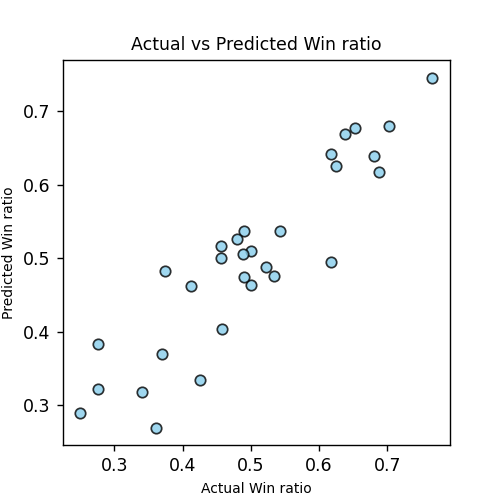

Text(0, 0.5, 'Predicted Win ratio')

In [33]:
#create a scatter plot to visualize the correlation between the actual win ratio and predicted win ratio
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(nba_full_df["win_ratio"],nba_full_df["pred_win_ratio"],c = "skyblue",
        edgecolor="black", linewidths=1,
      alpha=0.8)
plt.title('Actual vs Predicted Win ratio', fontsize=10)       
plt.xlabel("Actual Win ratio", fontsize=8)
plt.ylabel("Predicted Win ratio", fontsize=8)


In [21]:
# using the predicted win ratio, we calculate the total predicted wins of each team from the remaining games
# using 72 because the 2020-21 season is shortened to 72 games per team instead of the ususal 82 games
games_remaining = 72-nba_full_df["W"]-nba_full_df["L"]
nba_full_df["PW"] = (nba_full_df["pred_win_ratio"]*games_remaining).round(0)
# the assumption follows that the teams will lose the remaining games other than the predicted wins
nba_full_df["PL"] = games_remaining - nba_full_df["PW"]
# add existing actual wins to predicted wins for remainder games to arrive at total predicted wins for season
nba_full_df["PW"] = nba_full_df["PW"]+nba_full_df["W"]
nba_full_df["PL"] = nba_full_df["PL"]+nba_full_df["L"]
nba_full_df.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win_ratio,pred_win_ratio,PW,PL
0,Brooklyn Nets,33,15,0.688,—,119.1,114.8,3.68,Eastern,1.037456,0.687500,0.617284,48.0,24.0
1,Philadelphia 76ers,32,15,0.681,0.5,114.3,109.4,4.80,Eastern,1.044790,0.680851,0.638672,48.0,24.0
2,Milwaukee Bucks,30,17,0.638,2.5,118.9,112.6,6.12,Eastern,1.055950,0.638298,0.669900,47.0,25.0
3,Charlotte Hornets,24,22,0.522,8,111.7,112.1,-0.55,Eastern,0.996432,0.521739,0.488385,37.0,35.0
4,Miami Heat,24,24,0.500,9,106.0,107.2,-1.00,Eastern,0.988806,0.500000,0.463479,35.0,37.0


In [24]:
# create conference wise dataframes for predicted standings
nba_west_pred_standings = nba_full_df[nba_full_df["Conf"]=="Western"].sort_values(['PW'],ascending = 0).reset_index(drop=1)
nba_east_pred_standings = nba_full_df[nba_full_df["Conf"]=="Eastern"].sort_values(['PW'],ascending = 0).reset_index(drop=1)
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# add initial seeding to the teams, conflicts for teams with equal records will be sorted later
nba_west_pred_standings.insert(0,"seed",seeds)
nba_east_pred_standings.insert(0,"seed",seeds)

In [25]:
nba_west_pred_standings

,seed,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win_ratio,pred_win_ratio,PW,PL
0,1,Utah Jazz,36,11,0.766,—,116.8,107.5,9.78,Western,1.086512,0.765957,0.746236,55.0,17.0
1,2,Phoenix Suns,33,14,0.702,3,113.7,107.3,6.04,Western,1.059646,0.702128,0.679865,50.0,22.0
2,3,Los Angeles Clippers,32,17,0.653,5,114.9,108.5,6.37,Western,1.058986,0.653061,0.678101,48.0,24.0
3,4,Los Angeles Lakers,30,18,0.625,6.5,110.4,106.1,3.70,Western,1.040528,0.625000,0.626321,45.0,27.0
4,5,Denver Nuggets,29,18,0.617,7,115.5,110.4,5.22,Western,1.046196,0.617021,0.642696,45.0,27.0
5,6,Portland Trail Blazers,29,18,0.617,7,115.0,115.2,-0.84,Western,0.998264,0.617021,0.494353,41.0,31.0
6,7,Dallas Mavericks,25,21,0.543,10.5,112.2,110.9,1.91,Western,1.011722,0.543478,0.537804,39.0,33.0
7,8,San Antonio Spurs,24,21,0.533,11,109.8,110.6,-1.44,Western,0.992767,0.533333,0.476424,37.0,35.0
8,9,Memphis Grizzlies,22,23,0.489,13,111.6,111.4,0.68,Western,1.001795,0.488889,0.505829,36.0,36.0
9,10,Golden State Warriors,23,24,0.489,13,112.7,113.6,-0.39,Western,0.992077,0.489362,0.474172,35.0,37.0


In [26]:
nba_east_pred_standings

,seed,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win_ratio,pred_win_ratio,PW,PL
0,1,Brooklyn Nets,33,15,0.688,—,119.1,114.8,3.68,Eastern,1.037456,0.687500,0.617284,48.0,24.0
1,2,Philadelphia 76ers,32,15,0.681,0.5,114.3,109.4,4.80,Eastern,1.044790,0.680851,0.638672,48.0,24.0
2,3,Milwaukee Bucks,30,17,0.638,2.5,118.9,112.6,6.12,Eastern,1.055950,0.638298,0.669900,47.0,25.0
3,4,Charlotte Hornets,24,22,0.522,8,111.7,112.1,-0.55,Eastern,0.996432,0.521739,0.488385,37.0,35.0
4,5,New York Knicks,24,24,0.500,9,104.8,104.5,-0.46,Eastern,1.002871,0.500000,0.509316,36.0,36.0
5,6,Atlanta Hawks,23,24,0.489,9.5,112.4,111.1,1.26,Eastern,1.011701,0.489362,0.537736,36.0,36.0
6,7,Boston Celtics,23,25,0.479,10,112.2,111.3,1.25,Eastern,1.008086,0.479167,0.526151,36.0,36.0
7,8,Miami Heat,24,24,0.500,9,106.0,107.2,-1.00,Eastern,0.988806,0.500000,0.463479,35.0,37.0
8,9,Indiana Pacers,21,25,0.457,11,112.7,112.7,0.45,Eastern,1.000000,0.456522,0.500000,34.0,38.0
9,10,Chicago Bulls,19,27,0.413,13,112.7,114.0,-1.59,Eastern,0.988596,0.413043,0.462795,31.0,41.0


<IPython.core.display.Javascript object>


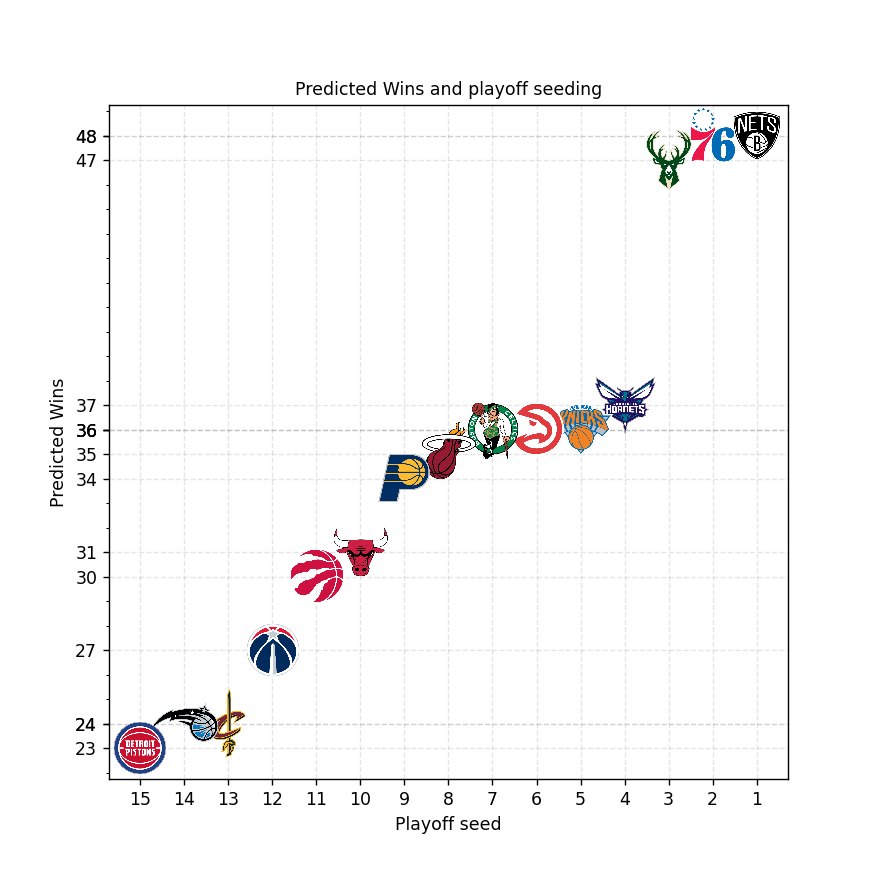

<IPython.core.display.Javascript object>


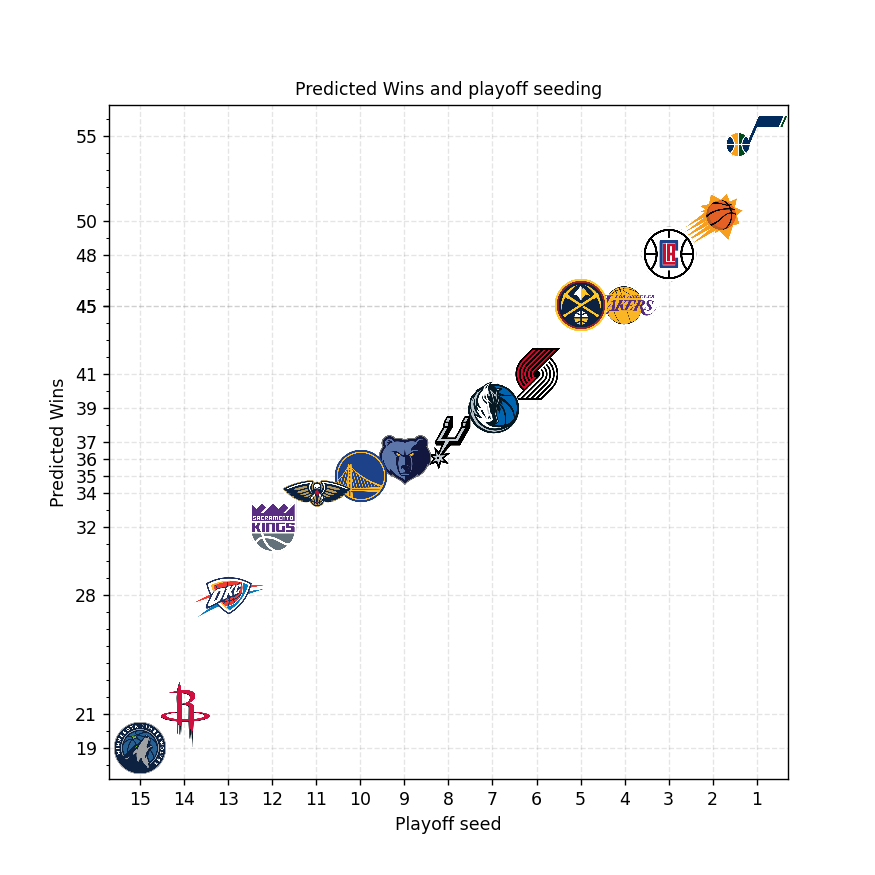

In [36]:
# create a function for the conference wise scatter plots
def main(conf):
    # list to store url paths for each team
    image_path = []
    # list to store team names to use for image retreival along with image_path
    team_name = []
    # scatter point color
    color = "skyblue"
    # loop to get the last word of a teams name, for the 76sixers, the name referred in all URLs is sixers
    for x in conf["Team"]:
        x = x.split()
        if x[-1] == "76ers":
            x[-1] = "sixers"
            # since sixers are in the eastern conference this next statement changes the color of the scatter points for the eastern conference plot
            color = "coral"
        #add the names to team_name list but in all lowercase
        team_name.append(x[-1].lower())
    # loop to create image path for images by adding teamname and extension
    for n in team_name:
        image_path.append('../images/'+n+'.png')
    # create a scatter plot based on parameters to the main function
    fig, ax = plt.subplots(figsize=(7,7))
    #ax.scatter(conf["seed"],conf["PW"],s=10*conf["PW"],c = color,
    #  edgecolor="black", linewidths=1,
    #  alpha=0.8, label = conf["Conf"][0])
    # code to run the imscatter function which replaces scatter points with individual team logos, cannot use this in public websites like Kaggle due to copyright concerns
    for x, y, image_pat in zip(conf["seed"],conf["PW"],image_path):
        imscatter(x, y, image_pat, zoom=0.1, ax=ax)

    # invert x-axis for better looking plots
    plt.gca().invert_xaxis()
    # set X and Y axis ticks
    plt.gca().set_xticks(conf["seed"])
    plt.gca().set_yticks(conf["PW"])
    
    # add titles and labels
    plt.title('Predicted Wins and playoff seeding', fontsize=10)       
    plt.xlabel("Playoff seed", fontsize=10)
    plt.ylabel("Predicted Wins", fontsize=10)
    # set grids to show below the scatter points
    ax.set_axisbelow(True)
    # add grid lines
    ax.yaxis.grid(color='gray', linestyle='dashed',alpha = 0.2)
    ax.xaxis.grid(color='gray', linestyle='dashed',alpha = 0.2)
    # set minor ticks on Y-axis for ease of reading the graphs
    ax.yaxis.set_minor_locator(tkr.MultipleLocator(1))
    # add a legend
    #plt.legend()

    # function to plot the images of indiviual team logos on to the scatter plot
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists
# call main function for each of the conference predicted standings data frames
main(nba_east_pred_standings)
main(nba_west_pred_standings)
plt.show()

